# Pixels and Pictures
Lab 2: Part 2

In this notebook, you will complete 5 coding tasks involving content from Chapter 10 and 11 of Montfort's Exploratory Programming from the Humanities.

Like previous labs, the instructions for each of the exercises (labeled 2-6 through 2-10) will be prefixed with "ON YOUR OWN". Add or modify the necessary code to the cell to satisfy the requirements.

## Tuples and Pixels
A `tuple` is a special sequence data type that is *immutable*. You can define a tuple by using a list of values separated by commas enclosed by parentheses:

In [2]:
myTuple = (1,2,3)


Like other sequences, you can access different parts of the tuple using indices:
```python
myTuple[1] # Prints 2, being the second elements
print(myTuple[-1]) # Prints 3, being the last element

In [3]:
print(myTuple[1])
print(myTuple[-1])

2
3


Tuples are immutable, meaning you cannot assign a value to a member. You must instead create a new tuple. This is useful for making assumptions about the data, and to make assumptions about the meaning of certain values exlicit:

In [5]:
# The following will produce a TypeError:
myTuple[1] = 0

TypeError: 'tuple' object does not support item assignment

In [7]:
from PIL import Image
mode = 'RGBA' # This states that each pixel will have four components
size = (100, 100) # This tuple refers to the dimensions of the image (100 pixels by 100 pixels)
color = 'black' # The default color for a pixel
ourimage = Image.new(mode, size, color)
# ourimage now contains a set of pixels that have the color 'black' and is 100 by 100 pixels in size.

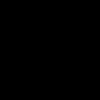

In [8]:
# We can display the image using Jupyter notebook:
ourimage

In [10]:
# This will save the image to the root of our project in VS Code. 
# You can specify a different directory as well.
ourimage.save('allblack.png')

In [15]:
# You can find out more about many methods by using the "help" function in addition to looking up the function on the web.
help(Image.new)

Help on function new in module PIL.Image:

new(mode, size, color=0)
    Creates a new image with the given mode and size.
    
    :param mode: The mode to use for the new image. See:
       :ref:`concept-modes`.
    :param size: A 2-tuple, containing (width, height) in pixels.
    :param color: What color to use for the image.  Default is black.
       If given, this should be a single integer or floating point value
       for single-band modes, and a tuple for multi-band modes (one value
       per band).  When creating RGB images, you can also use color
       strings as supported by the ImageColor module.  If the color is
       None, the image is not initialised.
    :returns: An :py:class:`~PIL.Image.Image` object.



# Setting Pixels
You can change a pixel to a new value using the `putpixel()` method. For instance, the following line will set the centermost pixel of our image to white:

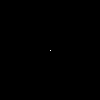

In [25]:
ourimage.putpixel((50,50),(255,255,255,255))
ourimage

In [24]:
# Often objects (and ourimage is an Image object) have properties that are useful. 
#For instance, the size can be obtained by the attribute 'size':
ourimage.size

(100, 100)

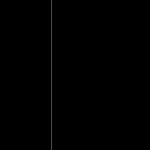

In [8]:
# [2-4] ON YOUR OWN: 
# Using code, create a new function that accepts three arguments: (1) an image created by Image.new, and (2) a y value, and (3) a color specified as a 4-tuple. 
# The function should return the image that has a vertical line drawn across it in the color provided.
# You must create the vertical line on an image of any size.
 
#from PIL import Image

#def quintuple(myImage, y, myTuple):
#myTuplets three arguments: (1) an image created by Image.new, and (2) an x value, and (3) a color specified as a 4-tuple. 
# The function should return the image that has a vertical line drawn across it in the color provided.
# You must create the vertical line on an image of any size.

from PIL import Image

newImage = Image.new('RGBA', (150,150), (0,0,0,255))
def quintuple(newImage, x, myTuple):
    a, b, c, d = myTuple
    y = 0
    if x > newImage.size[0]:
        raise ValueError('y should not be greater than 100!')
    while y < newImage.size[1]:
        newImage.putpixel((x,y), myTuple)
        y = y + 1
    return newImage

quintuple(newImage, 51, (255,0,0,255))


# Gradients
Montfort describes the following technique for creating a *linear* gradient, or one where the color changes smoothly across an image.

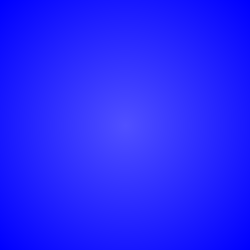

In [10]:
# [2-5] ON YOUR OWN:
# Write a function that generates a radial gradient in an image given a particular coordinate.
# the ones I am currently writing are based off the size of the image. They SHOULD be based on tehe location of the coordinates.

from PIL import Image
import math


def radial_gradient(c,d):
    imgsize = (250,250)
    image = Image.new('RGB', imgsize)

    innerColor = [80,80,255]
    outerColor = [0,0,255]

    for x in range(c):
        for y in range(d):
            distanceToCenter = math.sqrt((x - d/2) ** 2 + (y - c/2) ** 2)
            distanceToCenter = float(distanceToCenter) / (math.sqrt(2) * d/2)
            r = outerColor[0] * distanceToCenter + innerColor[0] * (1 - distanceToCenter)
            g = outerColor[1] * distanceToCenter + innerColor[1] * (1 - distanceToCenter)
            b = outerColor[2] * distanceToCenter + innerColor[2] * (1 - distanceToCenter)

            image.putpixel((x,y), (int(r), int(g), int(b)))
    return image

radial_gradient(250,250)

### Opening existing images
You can open an existing image by using the Image.open method:
```python
Image.open('cat.png')
```
Note that you will have to have the image file accessible by the version of Python.

In [8]:
cat = Image.open('cat.png')
cat

NameError: name 'Image' is not defined

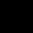

In [5]:
# [2-6] ON YOUR OWN:
# Write a function that takes as an input an image. 
# Create a "Thumbnail" image of the provided image that is 1/3 of the size of the original image, and return it. The new image should have the same color space as the original, and work with either RGB or RGBA color schemes.
#Create an image inside the method. Like chapter 10 [13/28]
from PIL import Image
original = Image.open('line.png')
def third(original):
    s = original.size[0]
    t = original.size[1]
    s = s // 3
    t = t // 3
    original = Image.new('RGB', (s, t))
    original.save('third.png')
    return original
third(original)



In [24]:
# [2-7] ON YOUR OWN:
# Given a formula to calculate the "luminance" of a pixel as:
#  L  =  0.2126 × R   +   0.7152 × G   +   0.0722 × B 
# Write a function that accepts an image and returns a new image that is in grayscale that is the same dimensions.

from PIL import Image
original = Image.open('lab2/convo.png')
def redness(square):
    all_red = 0
    others = 0
    for x in range(100):
        for y in range(100):
            red, green, blue, alpha = square.getpixel((x, y))
            greyscale = (0.126 * red) + 
    return all_red - (others / 2)
redness(original)


-62441.5

In [25]:
from PIL import Image
original = Image.open('lab2/convo.png')
def redness(square):
    all_red = 0
    others = 0
    for x in range(100):
        for y in range(100):
            red, green, blue, alpha = square.getpixel((x, y))
            all_red = all_red + red
            others = others + green + blue
    return all_red - (others / 2)
redness(original)


-62441.5

In [0]:
# [2-8] ON YOUR OWN:
# Write a function that applies the grayscale method to all of the image files in a directory.
# Use the Glob library. Make sure the new images have "_gray" appended to their name. This means "img1.png" would be written as "img1_gray.png". Guidance for doing this can be found in Montfort's Chapter 11. 
#11.6

import glob
file_list = glob.glob('*.png')